<a href="https://colab.research.google.com/github/Shivakumar-DS/NPN/blob/master/Alcohol_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [0]:
alcohol_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Files/Alcohol_Sales.csv')

In [0]:
alcohol_data.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [0]:
alcohol_data.columns = ['DATE','Sales']

In [0]:
alcohol_data.head()

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [0]:
alcohol_data.set_index('DATE')

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [0]:
# Convert DATE into Datetime
alcohol_data['DATE']=pd.to_datetime(alcohol_data['DATE'])
alcohol_data.set_index('DATE',inplace=True)

In [0]:
alcohol_data.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [0]:
alcohol_data.describe()

,Sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


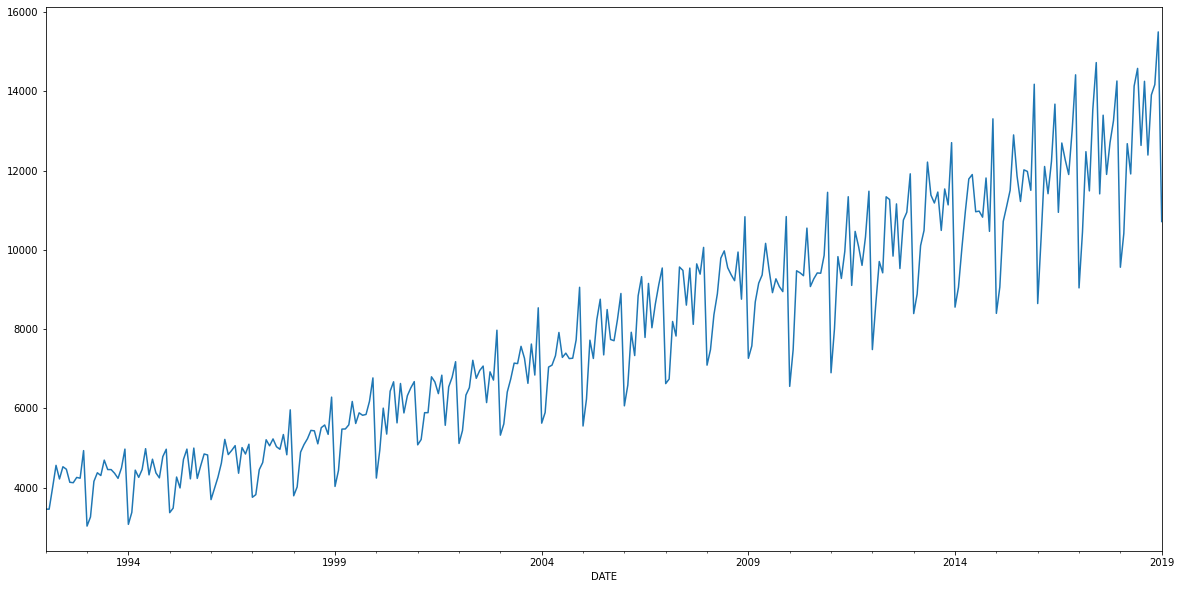

In [0]:
plt.figure(figsize=(20,10))
alcohol_data['Sales'].plot()

In [0]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(alcohol_data['Sales'])

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
adfuller_test(alcohol_data['Sales'])

ADF Test Statistic : 2.0374047259137082
p-value : 0.9987196267088919
#Lags Used : 14
Number of Observations Used : 310
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [0]:
alcohol_data['Sales First Difference'] = alcohol_data['Sales'] - alcohol_data['Sales'].shift(1)
alcohol_data['Seasonal First Difference'] = alcohol_data['Sales'] - alcohol_data['Sales'].shift(12)

In [0]:
alcohol_data.head(15)

,Sales,Sales First Difference,Seasonal First Difference
DATE,,,
1992-01-01,3459,NaN,NaN
1992-02-01,3458,-1.0,NaN
1992-03-01,4002,544.0,NaN
1992-04-01,4564,562.0,NaN
1992-05-01,4221,-343.0,NaN
1992-06-01,4529,308.0,NaN
1992-07-01,4466,-63.0,NaN
1992-08-01,4137,-329.0,NaN
1992-09-01,4126,-11.0,NaN


In [0]:
## Again test dickey fuller test
adfuller_test(alcohol_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.3393107296695326
p-value : 0.013210159306746865
#Lags Used : 13
Number of Observations Used : 299
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


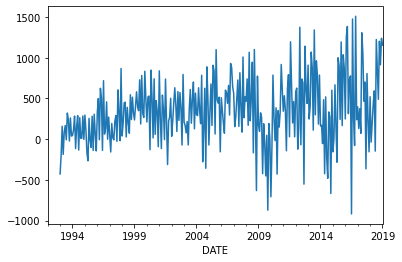

In [0]:
alcohol_data['Seasonal First Difference'].plot()

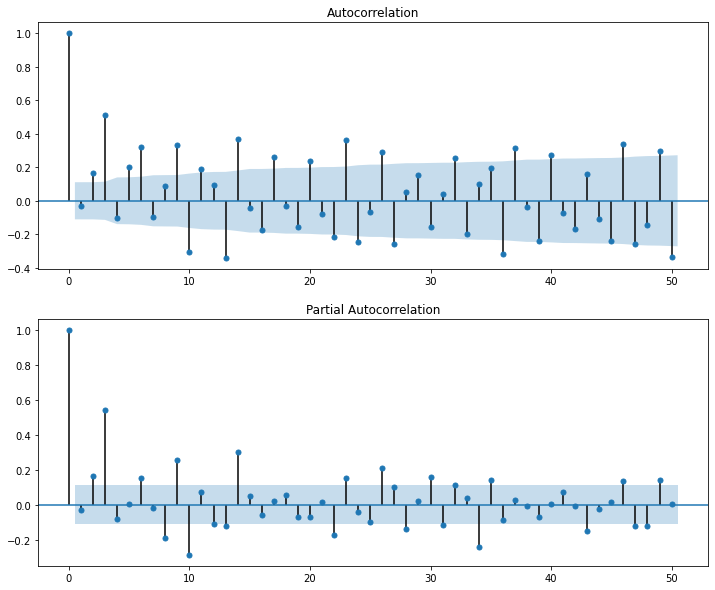

In [0]:
#Auto Regressive Model
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(alcohol_data['Seasonal First Difference'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(alcohol_data['Seasonal First Difference'].iloc[13:],lags=50,ax=ax2)

In [0]:
#p,d,q 
# p = AR (Auto Regression) model lags
# d = differencing
# q = MA (Moving Average) lags
model=ARIMA(alcohol_data['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [0]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2695.184
Method:                       css-mle   S.D. of innovations            988.048
Date:                Fri, 12 Jun 2020   AIC                           5398.367
Time:                        10:06:28   BIC                           5413.490
Sample:                    02-01-1992   HQIC                          5404.403
                         - 01-01-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.8524      2.451     11.770      0.000      24.048      33.657
ar.L1.D.Sales     0.0656      0.058      1.127      0.261      -0.049       0.180
ma.L1.D.Sales    -0.9616      0.015    -62.964      0.000      -0.992      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           15.2403           +0.0000j           15.2403            0.0000
MA.1            1.0399           +0.0000j            1.0399            0.0000
-----------------------------------------------------------------------------
"""

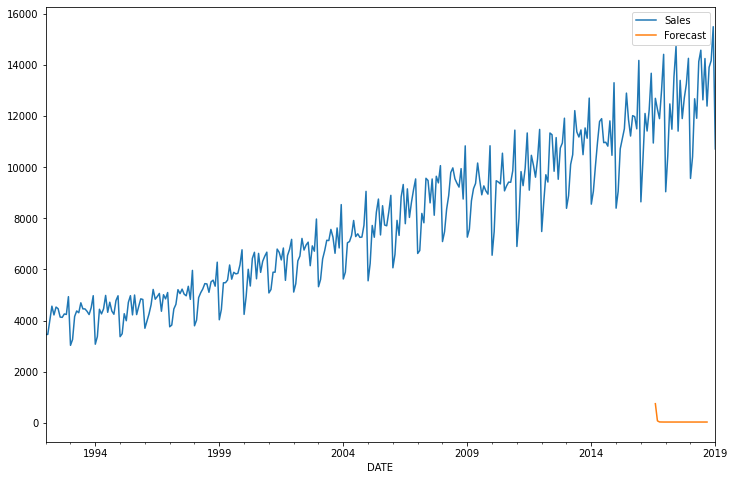

In [0]:
alcohol_data['Forecast']=model_fit.predict(start=295,end=320,dynamic=True)
alcohol_data[['Sales','Forecast']].plot(figsize=(12,8))

In [0]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(alcohol_data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


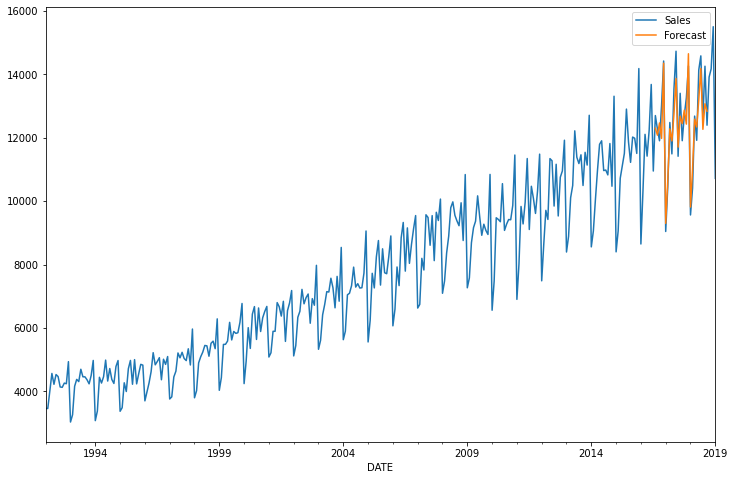

In [0]:
alcohol_data['Forecast']=results.predict(start=295,end=320,dynamic=True)
alcohol_data[['Sales','Forecast']].plot(figsize=(12,8))

In [0]:
from pandas.tseries.offsets import DateOffset
future_dates=[alcohol_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [0]:
future_data_test_df=pd.DataFrame(index=future_dates[1:],columns=alcohol_data.columns)

In [0]:
future_df=pd.concat([alcohol_data,future_data_test_df])

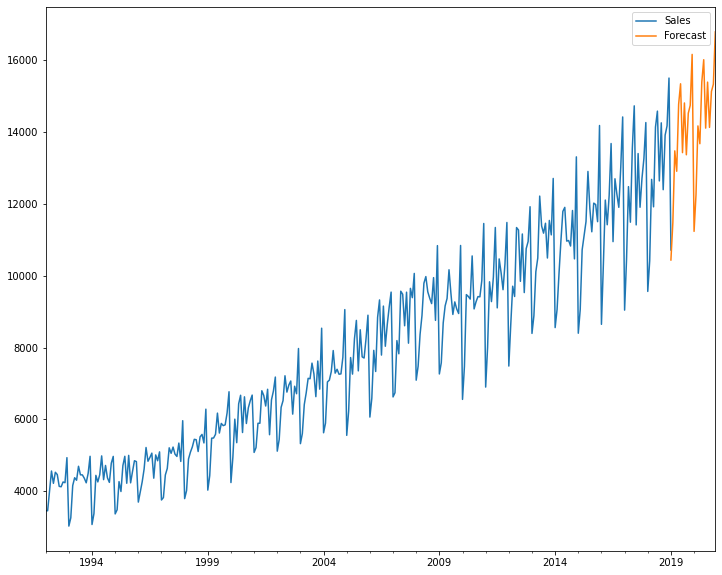

In [0]:
future_df['Forecast'] = results.predict(start = 324, end = 350, dynamic= True)  
future_df[['Sales', 'Forecast']].plot(figsize=(12, 10))